In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import string
import os
import re
from textblob import TextBlob
from wordcloud import STOPWORDS,WordCloud
from sklearn.model_selection import train_test_split


In [2]:
pd.set_option('display.max_column', 20)

In [3]:
data = pd.read_csv('processed_tweet_data.csv')

In [4]:
df = data.copy()

In [5]:
df.head()

,created_at,source,original_text,cleaned_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,statuses_count
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,iameztoy extra random image ilets focus one sp...,"Sentiment(polarity=-0.125, subjectivity=0.190625)",-1.250000e-01,0.190625,en,15760,2,i_ameztoy,232,20497,2621,False,"[{'text': 'City', 'indices': [132, 137]}]","[{'screen_name': 'i_ameztoy', 'name': 'Iban Am...",NaN,NaN,8097
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,indopacinfo chinas media explains military rea...,"Sentiment(polarity=-0.1, subjectivity=0.1)",-1.000000e-01,0.100000,en,6967,201,ZIisq,3,65,272,False,"[{'text': 'China', 'indices': [18, 24]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",NaN,NaN,5831
2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",china even cut communication dont anwer phonec...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000e+00,0.000000,en,2166,0,Fin21Free,0,85,392,NaN,"[{'text': 'XiJinping', 'indices': [127, 137]}]","[{'screen_name': 'ZelenskyyUa', 'name': 'Волод...",Netherlands,NaN,1627
3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",putin xijinping told friend taiwan vassal stat...,"Sentiment(polarity=0.1, subjectivity=0.35)",1.000000e-01,0.350000,en,2166,0,Fin21Free,0,85,392,NaN,"[{'text': 'XiJinping', 'indices': [9, 19]}]",[],Netherlands,NaN,1627
4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",chinauncensored im sorry thought taiwan indepe...,"Sentiment(polarity=-6.938893903907228e-18, sub...",-6.938894e-18,0.556250,en,17247,381,VizziniDolores,0,910,2608,False,[],"[{'screen_name': 'ChinaUncensored', 'name': 'C...","Ayent, Schweiz",NaN,18958


In [6]:
df.columns

Index(['created_at', 'source', 'original_text', 'cleaned_text', 'sentiment',
       'polarity', 'subjectivity', 'lang', 'favorite_count', 'retweet_count',
       'original_author', 'screen_count', 'followers_count', 'friends_count',
       'possibly_sensitive', 'hashtags', 'user_mentions', 'place',
       'place_coord_boundaries', 'statuses_count'],
      dtype='object')

In [7]:
df.shape

(22000, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_at              22000 non-null  object 
 1   source                  22000 non-null  object 
 2   original_text           22000 non-null  object 
 3   cleaned_text            22000 non-null  object 
 4   sentiment               22000 non-null  object 
 5   polarity                22000 non-null  float64
 6   subjectivity            22000 non-null  float64
 7   lang                    22000 non-null  object 
 8   favorite_count          22000 non-null  int64  
 9   retweet_count           22000 non-null  int64  
 10  original_author         22000 non-null  object 
 11  screen_count            22000 non-null  int64  
 12  followers_count         22000 non-null  int64  
 13  friends_count           22000 non-null  int64  
 14  possibly_sensitive      18905 non-null

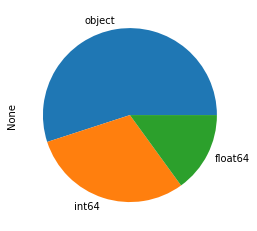

In [9]:
plt.figure()
df.dtypes.value_counts().plot.pie()
plt.savefig('My_data_type.png')

# Data preparation

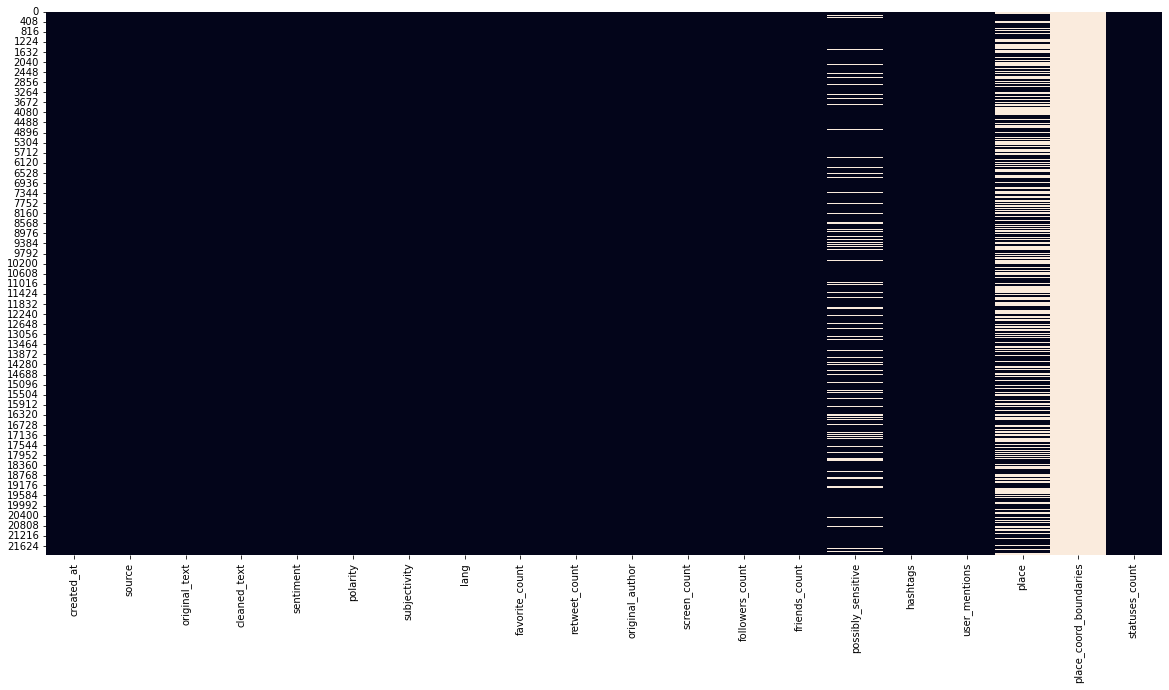

In [10]:
# Look at the missing values
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)
plt.savefig('Missing_values_mydata.png')

## Note from the plot
There is no much missing values in the data. Missing values are noticed in sensitivity, place and place cordinates.
100% of the values in place_coordinates are missed. This field will be droped.

### Droping place_coord_boundaries

In [11]:
df = df.drop(['place_coord_boundaries'], axis=1)

### Splitting the data by dtypes

In [12]:
df_float = df.select_dtypes('float')

In [13]:
df_int = df.select_dtypes('int')

In [14]:
df_obj = df.select_dtypes('object')

### Percentage of missing values in sensitivity and place

##### df_missing = df[['possibly_sensitive','place']]
(df_missing.isna().sum()/df.shape[0]).sort_values(ascending=False)

## Note
There are not a lot of missing values in possibly sensisitive. We can try to fill them.
For place, we will just explore it with univariate analysis

### Form a new data frame (named cleanTweet), containing columns 𝐜𝐥𝐞𝐚𝐧-𝐭𝐞𝐱𝐭 and 𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲

In [15]:
cleanTweet = pd.DataFrame(columns=['text','polarity'])
cleanTweet['text'] = df['cleaned_text'].to_list()
cleanTweet['polarity'] = df['polarity'].to_list()

### Write a function text_category that takes a value p and returns, depending on the value of p, a string 'positive', 'negative' or 'neutral'

In [16]:
def text_category(p):
    if p < 0:
        category = 'negative'
    elif p == 0:
        category = 'neutral'
    else:
        category = 'positive'
    return category

### Apply this function (text_category) on the polarity column of cleanTweet in 1 above to form a new column called scores in cleanTweet

In [17]:
polarities = [TextBlob(t).sentiment.polarity for t in df['original_text'].to_list()]

scores = [text_category(p) for p in polarities]

cleanTweet['scores'] = scores

### Construct a column 𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩 Use the mapping {'positive':1, 'negative':0} on the 𝐬𝐜𝐨𝐫𝐞 column

In [18]:
scoremap = {'positive':1, 'negative':0} 
cleanTweet['scoremap'] = cleanTweet['scores'].map(scoremap)

### Add the scoremap to the general dataset

In [19]:
df['scores'] = cleanTweet['scoremap'].to_list()
df

,created_at,source,original_text,cleaned_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,statuses_count,scores
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,iameztoy extra random image ilets focus one sp...,"Sentiment(polarity=-0.125, subjectivity=0.190625)",-1.250000e-01,0.190625,en,15760,2,i_ameztoy,232,20497,2621,False,"[{'text': 'City', 'indices': [132, 137]}]","[{'screen_name': 'i_ameztoy', 'name': 'Iban Am...",NaN,8097,0.0
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,indopacinfo chinas media explains military rea...,"Sentiment(polarity=-0.1, subjectivity=0.1)",-1.000000e-01,0.100000,en,6967,201,ZIisq,3,65,272,False,"[{'text': 'China', 'indices': [18, 24]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",NaN,5831,0.0
2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",china even cut communication dont anwer phonec...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000e+00,0.000000,en,2166,0,Fin21Free,0,85,392,NaN,"[{'text': 'XiJinping', 'indices': [127, 137]}]","[{'screen_name': 'ZelenskyyUa', 'name': 'Волод...",Netherlands,1627,NaN
3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",putin xijinping told friend taiwan vassal stat...,"Sentiment(polarity=0.1, subjectivity=0.35)",1.000000e-01,0.350000,en,2166,0,Fin21Free,0,85,392,NaN,"[{'text': 'XiJinping', 'indices': [9, 19]}]",[],Netherlands,1627,1.0
4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",chinauncensored im sorry thought taiwan indepe...,"Sentiment(polarity=-6.938893903907228e-18, sub...",-6.938894e-18,0.556250,en,17247,381,VizziniDolores,0,910,2608,False,[],"[{'screen_name': 'ChinaUncensored', 'name': 'C...","Ayent, Schweiz",18958,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,Sat Aug 06 18:03:29 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: A good infographic of #China...,indopacinfo good infographic chinas missile la...,"Sentiment(polarity=0.7, subjectivity=0.6000000...",7.000000e-01,0.600000,en,9683,183,VandelayT,2,62,471,False,"[{'text': 'China', 'indices': [40, 46]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",NaN,6600,1.0
21996,Sat Aug 06 18:03:27 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: A good infographic of #China...,indopacinfo good infographic chinas missile la...,"Sentiment(polarity=0.7, subjectivity=0.6000000...",7.000000e-01,0.600000,en,11538,183,sashalenik,0,94,1751,False,"[{'text': 'China', 'indices': [40, 46]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",Gelendzhik,3739,1.0
21997,Sat Aug 06 18:03:27 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",@Reuters Thanks #Pelosi smart move.,reuters thanks pelosi smart move,"Sentiment(polarity=0.20714285714285713, subjec...",2.071429e-01,0.421429,en,1940,0,ZeitounRimal,0,88,0,NaN,"[{'text': 'Pelosi', 'indices': [16, 23]}]","[{'screen_name': 'Reuters', 'name': 'Reuters',...",🇺🇲🇷🇺🇺🇦🇫🇷🇦🇪🇮🇱🏳️‍🌈,3540,1.0
21998,Sat Aug 06 18:03:26 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #Taiwan people's Desire for ...,indopacinfo taiwan peoples desire unification ...,"Sentiment(polarity=0.05, subjectivity=0.35)",5.000000e-02,0.350000,en,11849,67,SazzyCowgirl1,5,537,317,False,"[{'text': 'Taiwan', 'indices': [18, 25]}, {'te...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...","Oregon, USA",21833,1.0


### Remove rows from cleanTweet where score = nan (i.e where 𝐬𝐜𝐨𝐫𝐞 = Neutral) and reset the frame index.

In [20]:
df = df.loc[df['scores'].isna() == False]

In [21]:
df['scores'] = df['scores'].astype('int')

/tmp/ipykernel_5999/2066223107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scores'] = df['scores'].astype('int')


In [103]:
df_float = df.select_dtypes('float')
df_int = df.select_dtypes('int')
df_obj = df.select_dtypes('object')

### Explanatory Data Aalysis

## Object data analysis

In [104]:
df_obj.head()

,created_at,source,original_text,cleaned_text,sentiment,lang,original_author,possibly_sensitive,hashtags,user_mentions,place
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,iameztoy extra random image ilets focus one sp...,"Sentiment(polarity=-0.125, subjectivity=0.190625)",en,i_ameztoy,False,"[{'text': 'City', 'indices': [132, 137]}]","[{'screen_name': 'i_ameztoy', 'name': 'Iban Am...",NaN
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,indopacinfo chinas media explains military rea...,"Sentiment(polarity=-0.1, subjectivity=0.1)",en,ZIisq,False,"[{'text': 'China', 'indices': [18, 24]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",NaN
3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",putin xijinping told friend taiwan vassal stat...,"Sentiment(polarity=0.1, subjectivity=0.35)",en,Fin21Free,NaN,"[{'text': 'XiJinping', 'indices': [9, 19]}]",[],Netherlands
4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",chinauncensored im sorry thought taiwan indepe...,"Sentiment(polarity=-6.938893903907228e-18, sub...",en,VizziniDolores,False,[],"[{'screen_name': 'ChinaUncensored', 'name': 'C...","Ayent, Schweiz"
5,Sun Aug 07 22:31:02 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @benedictrogers: We must not let this happe...,benedictrogers must let happenwe must readywe ...,"Sentiment(polarity=0.2, subjectivity=0.5)",en,GraceCh15554845,False,"[{'text': 'Taiwan', 'indices': [84, 91]}]","[{'screen_name': 'benedictrogers', 'name': 'Be...","Melbourne, Victoria"


### Text univariate analysis

### Languages

In [105]:
df_obj['lang'].value_counts()

en    13015
Name: lang, dtype: int64

### *Note*
All the text are in english. 'lang' is not anymore a variable then.

### Texts

In [106]:
#text Preprocessing
df_text = df_obj.copy()

In [107]:
df_text['cleaned_text'] = df_text['cleaned_text'].astype(str)
df_text['cleaned_text'] = df_text['cleaned_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

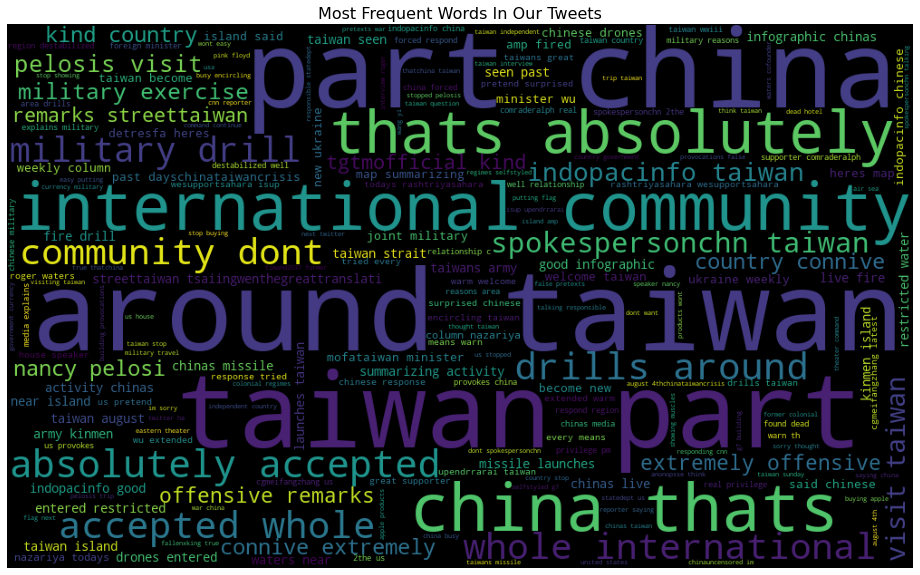

In [108]:
# Plot
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000, height=600, stopwords=STOPWORDS).generate(' '.join(df_text.cleaned_text.values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.savefig('Wordcloud_text.png')


## *Note*
We can notice that the most frequent words in the tweets are "China", "Taiwan", "arround", "part", "community", "International". 

We can conclude that the topics are about china and taiwan.

### Original authors

In [109]:
by_authors = df_obj['original_author'].value_counts()
by_authors

TrumpThuan         77
CGMeifangZhang     49
Maple37965949      33
Lin73324756        32
Bin20211001        31
                   ..
xhoshinda           1
Juice42089          1
Truthbe08780282     1
tspoonemore         1
ZeitounRimal        1
Name: original_author, Length: 8807, dtype: int64

#### Top 5 authors of the tweets 

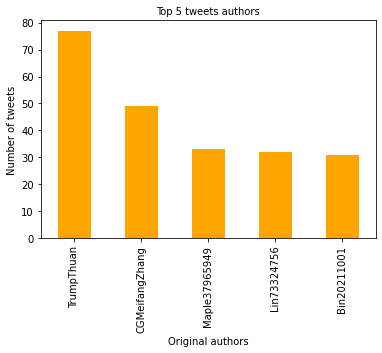

In [110]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Original authors', fontsize=10)
ax.set_ylabel('Number of tweets' , fontsize=10)
ax.set_title('Top 5 tweets authors', fontsize=10)
by_authors[:5].plot(ax=ax, kind='bar', color='orange')
plt.savefig('texts_by_authors.png')

#### *Note*
The top 5 authors are: TrumpThuan, CGMeifangZhang, Maple37965949, Lin73324756, Bin20211001

### Hashtags

In [111]:
df_obj['hashtags']

0                [{'text': 'City', 'indices': [132, 137]}]
1        [{'text': 'China', 'indices': [18, 24]}, {'tex...
3              [{'text': 'XiJinping', 'indices': [9, 19]}]
4                                                       []
5                [{'text': 'Taiwan', 'indices': [84, 91]}]
                               ...                        
21995    [{'text': 'China', 'indices': [40, 46]}, {'tex...
21996    [{'text': 'China', 'indices': [40, 46]}, {'tex...
21997            [{'text': 'Pelosi', 'indices': [16, 23]}]
21998    [{'text': 'Taiwan', 'indices': [18, 25]}, {'te...
21999    [{'text': 'Taiwan', 'indices': [18, 25]}, {'te...
Name: hashtags, Length: 13015, dtype: object

In [112]:
#Method to find hashtags from texts
def find_hashtags(text):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', text)

In [113]:
# update Hashtage columon with hashtages extracted from Orignal_text columon
df_obj['hashtags'] = df_obj.original_text.apply(find_hashtags)
print(df_obj['hashtags'])

0                                 [#City, #Ta]
1                            [#China, #Taiwan]
3                                 [#XiJinping]
4                                           []
5                                    [#Taiwan]
                         ...                  
21995    [#China, #Taiwan, #ChinaTaiwanCrisis]
21996    [#China, #Taiwan, #ChinaTaiwanCrisis]
21997                                [#Pelosi]
21998                        [#Taiwan, #China]
21999                        [#Taiwan, #China]
Name: hashtags, Length: 13015, dtype: object


/tmp/ipykernel_5999/824839339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obj['hashtags'] = df_obj.original_text.apply(find_hashtags)


In [114]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df_obj.loc[
                       df_obj.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [115]:
hashtags_list_df

,hashtags
0,"[#City, #Ta]"
1,"[#China, #Taiwan]"
3,[#XiJinping]
5,[#Taiwan]
6,"[#Taiwan, #TsaiIngwen, #TheGreatTranslati]"
...,...
21995,"[#China, #Taiwan, #ChinaTaiwanCrisis]"
21996,"[#China, #Taiwan, #ChinaTaiwanCrisis]"
21997,[#Pelosi]
21998,"[#Taiwan, #China]"


In [116]:
 #create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [117]:
flattened_hashtags_df

,hashtag
0,#City
1,#Ta
2,#China
3,#Taiwan
4,#XiJinping
...,...
32229,#Pelosi
32230,#Taiwan
32231,#China
32232,#Taiwan


In [118]:
#add flatten_hashtags to tweet_df
df_obj["flattened_hashtags"]= flattened_hashtags_df

/tmp/ipykernel_5999/1474256746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obj["flattened_hashtags"]= flattened_hashtags_df


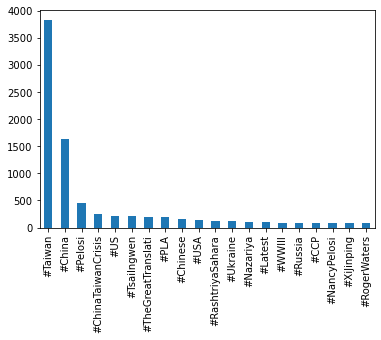

In [119]:
# To plot Top 20 Hashtags
plt.figure()
df_obj['flattened_hashtags'].value_counts()[:20].plot(kind='bar')
plt.savefig('hashtags_plot.png')

### *Note*
The 3 top hastags are #Taiwan, #China and #Pelosi.

### Places

The top 5 places where tweets are from

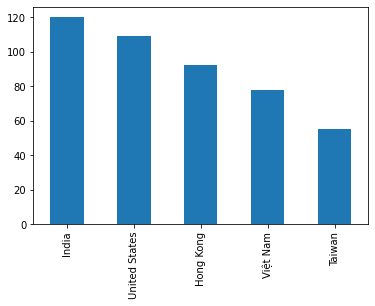

In [120]:
plt.figure()
df_obj['place'].value_counts()[:5].plot(kind='bar')
plt.savefig('places_plot.png')

### *Note*

The top 5 places where the tweets are India, US, Hong Kong, Vietnam and Taiwan

## Float (Continuous) data analysis

In [121]:
df_float.head()

,polarity,subjectivity
0,-1.250000e-01,0.190625
1,-1.000000e-01,0.100000
3,1.000000e-01,0.350000
4,-6.938894e-18,0.556250
5,2.000000e-01,0.500000


### Histogram of polarity and subjectivity

/home/jds98/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jds98/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


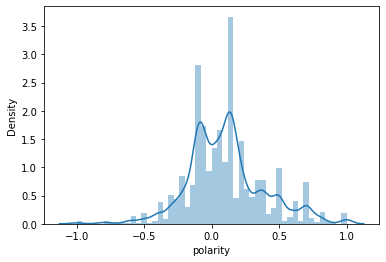

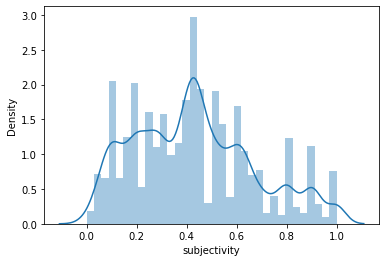

In [122]:
for col in df_float:
    plt.figure()
    sns.distplot(df[col])
    plt.savefig(f'{col}_plot.png')

#### Small comments

*Polarity distribution* : can be well approximated by normal a normal distribution. In general, most of the polarities are around zero while remaining larger than zero.

*Subjectivity*: Most of the values are between 0 and 0.6.

### Polarity, Subjectivity vs Sentiments scores

In [123]:
df_float['scores'] = df['scores']

/tmp/ipykernel_5999/737536249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_float['scores'] = df['scores']


### Creation of two subsets of data: one for positives scores and negatives scores

In [124]:
positive_df = df_float[df_float['scores'] == 1]
negative_df = df_float[df_float['scores'] == 0]

In [125]:
positive_df['scores'].value_counts()

1    8182
Name: scores, dtype: int64

In [126]:
negative_df['scores'].value_counts()

0    4833
Name: scores, dtype: int64

/home/jds98/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jds98/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jds98/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

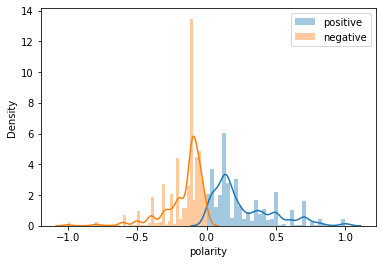

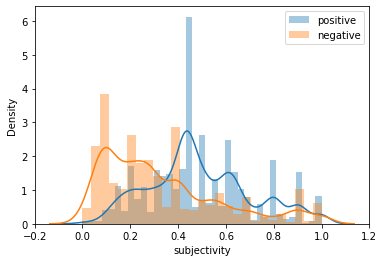

In [127]:
for col in df_float.select_dtypes('float'):
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.savefig(f'{col}_vs_scores_plot.png')
    plt.legend()

### Small comment

Positive sentiment is generally related to subjectivity greater than 0.4 while negaive sentiment is generally related to subjectivity less than 0.4.

### int (Count) data analysis

In [129]:
df_int = df_int.drop(['scores'], axis=1)

In [130]:
df_int['polarity'] = df_float['polarity']

### Visualization

### Correlation between the variables and with polarity

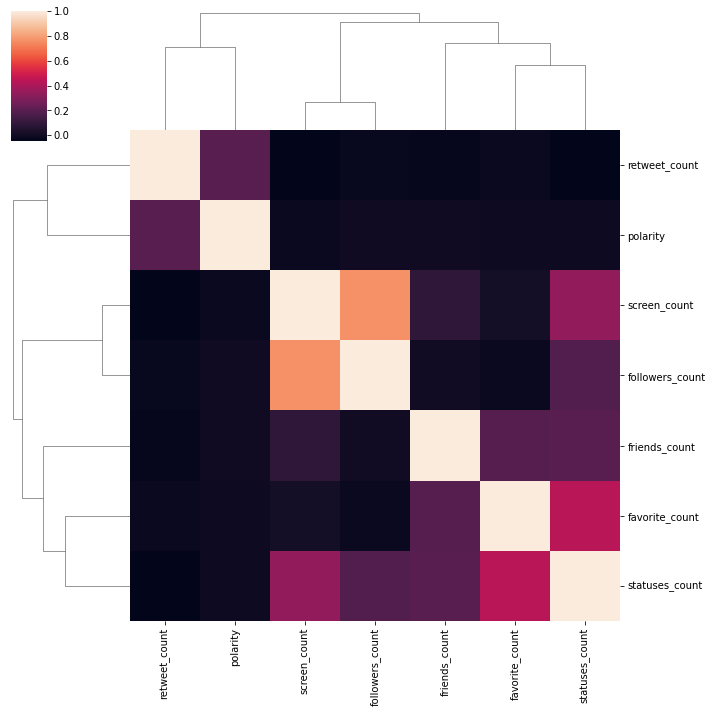

In [132]:
sns.clustermap(df_int.corr())

### Note
The polarity (sentiments) is not correlated with the count variables. However, it's weeakly correlated with retweeting.

Screen count is correlated with followers counts and favorite count is correlated with status count.

### Cross tab sensitivity and score

In [137]:
pd.crosstab(df['scores'], df['possibly_sensitive'])

possibly_sensitive,False,True
scores,,
0,3996,70
1,6917,54


<AxesSubplot:xlabel='possibly_sensitive', ylabel='scores'>

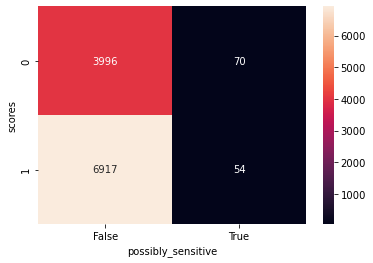

In [138]:
sns.heatmap(pd.crosstab(df['scores'], df['possibly_sensitive']), annot=True, fmt='d')

In [147]:
from scipy.stats import chi2_contingency 
  
chi2_test = pd.crosstab(df['scores'], df['possibly_sensitive'])
stat, p, dof, expected = chi2_contingency(chi2_test) 

In [149]:
print(p)

8.21701993480062e-06


### Comment: Looking at the p-value, sentiments and sensitivity are dependants.